In [6]:
import pandas as pd

files = [
    "api_data_aadhar_biometric_0_500000.csv",
    "api_data_aadhar_biometric_500000_1000000.csv",
    "api_data_aadhar_biometric_1000000_1500000.csv",
    "api_data_aadhar_biometric_1500000_1861108.csv",
]

bio_df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

bio_df.head()


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


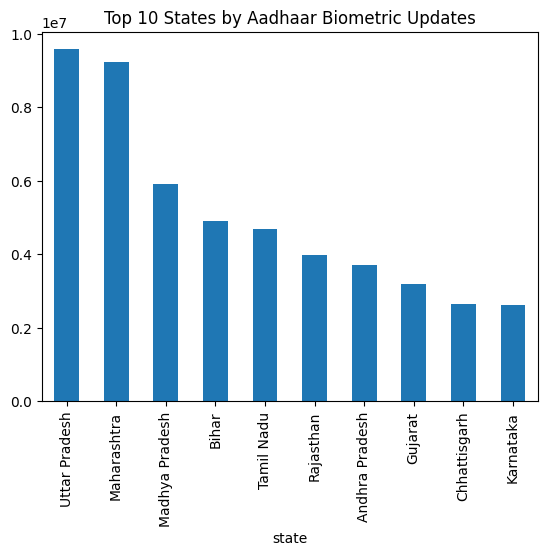

In [7]:
import matplotlib.pyplot as plt

# date format
bio_df['date'] = pd.to_datetime(bio_df['date'], dayfirst=True)

# biometric columns (auto-detect)
biometric_cols = [c for c in bio_df.columns if c not in ['date','state','district','pincode']]

# total biometric updates
bio_df['total_updates'] = bio_df[biometric_cols].sum(axis=1)

# state-wise total
state_updates = bio_df.groupby('state')['total_updates'].sum().sort_values(ascending=False)

# bar graph (top 10 states)
state_updates.head(10).plot(kind='bar', title='Top 10 States by Aadhaar Biometric Updates')
plt.show()


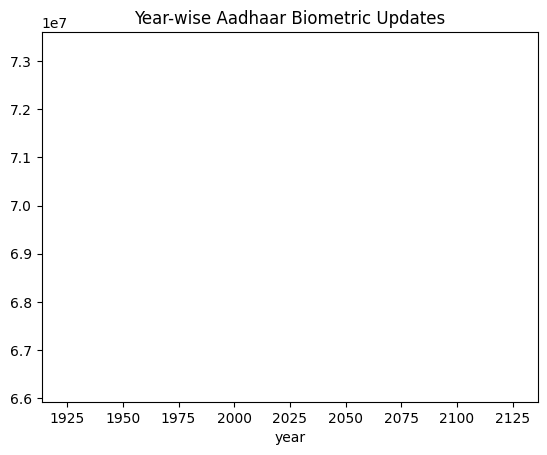

In [8]:
# year column
bio_df['year'] = bio_df['date'].dt.year

# year-wise total biometric updates
yearly_updates = bio_df.groupby('year')['total_updates'].sum()

# line graph
yearly_updates.plot(kind='line', title='Year-wise Aadhaar Biometric Updates')
plt.show()
